<font size="5">**Imports**</font>

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<font size="3">**Data**</font>

In [109]:
import os
os.listdir("data")

['.ipynb_checkpoints',
 'data_description.txt',
 'house.jfif',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [110]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [111]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Totalt har vi 79 features i datasettet vårt.<br>
79 er veldig mange features. Senere vil vi redusere antallet og bruke  de beste.

In [90]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [91]:
print(test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [114]:
corr_matrix = train.corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<font size="3">**Preprossessering**</font>

In [115]:
houseValues = train['SalePrice']

train = train.drop(['SalePrice','Id'],1)

train_catNA = train[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']]

train_catNoNA = train.select_dtypes('object').drop(train_catNA,1)

train_num = train.drop(train.select_dtypes('object'),1)

train_cat = np.concatenate([train_catNoNA,train_catNA],axis=1)

Her deler vi opp dataen inn i 3: 

- kategoriske verdier som kan ha verdi = 'NA' eks. 'No alley' (train_catNA)
- kategoriske verdier hvor 'NA' betyr missing value (train_catNoNA)
- numeriske verdier (train_num)

In [126]:
#Imputing data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(train_num)

imp_mostFrequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_catNoNA = imp_mostFrequent.fit_transform(train_catNoNA)

imp_toNA = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="NA")
train_catNa = imp_toNA.fit_transform(train_catNA)

Velger å fylle missing values av numerisk type med mean, kategoriske med most_frequent og gjør om missing til string "NA".

In [125]:
encoder = OneHotEncoder()
train_catNumNa = encoder.fit_transform(train_catNA)
train_catNumNoNa = encoder.fit_transform(train_catNoNA)

Så blir de kategoriske verdiene omgjort til tall også med onehotencoder

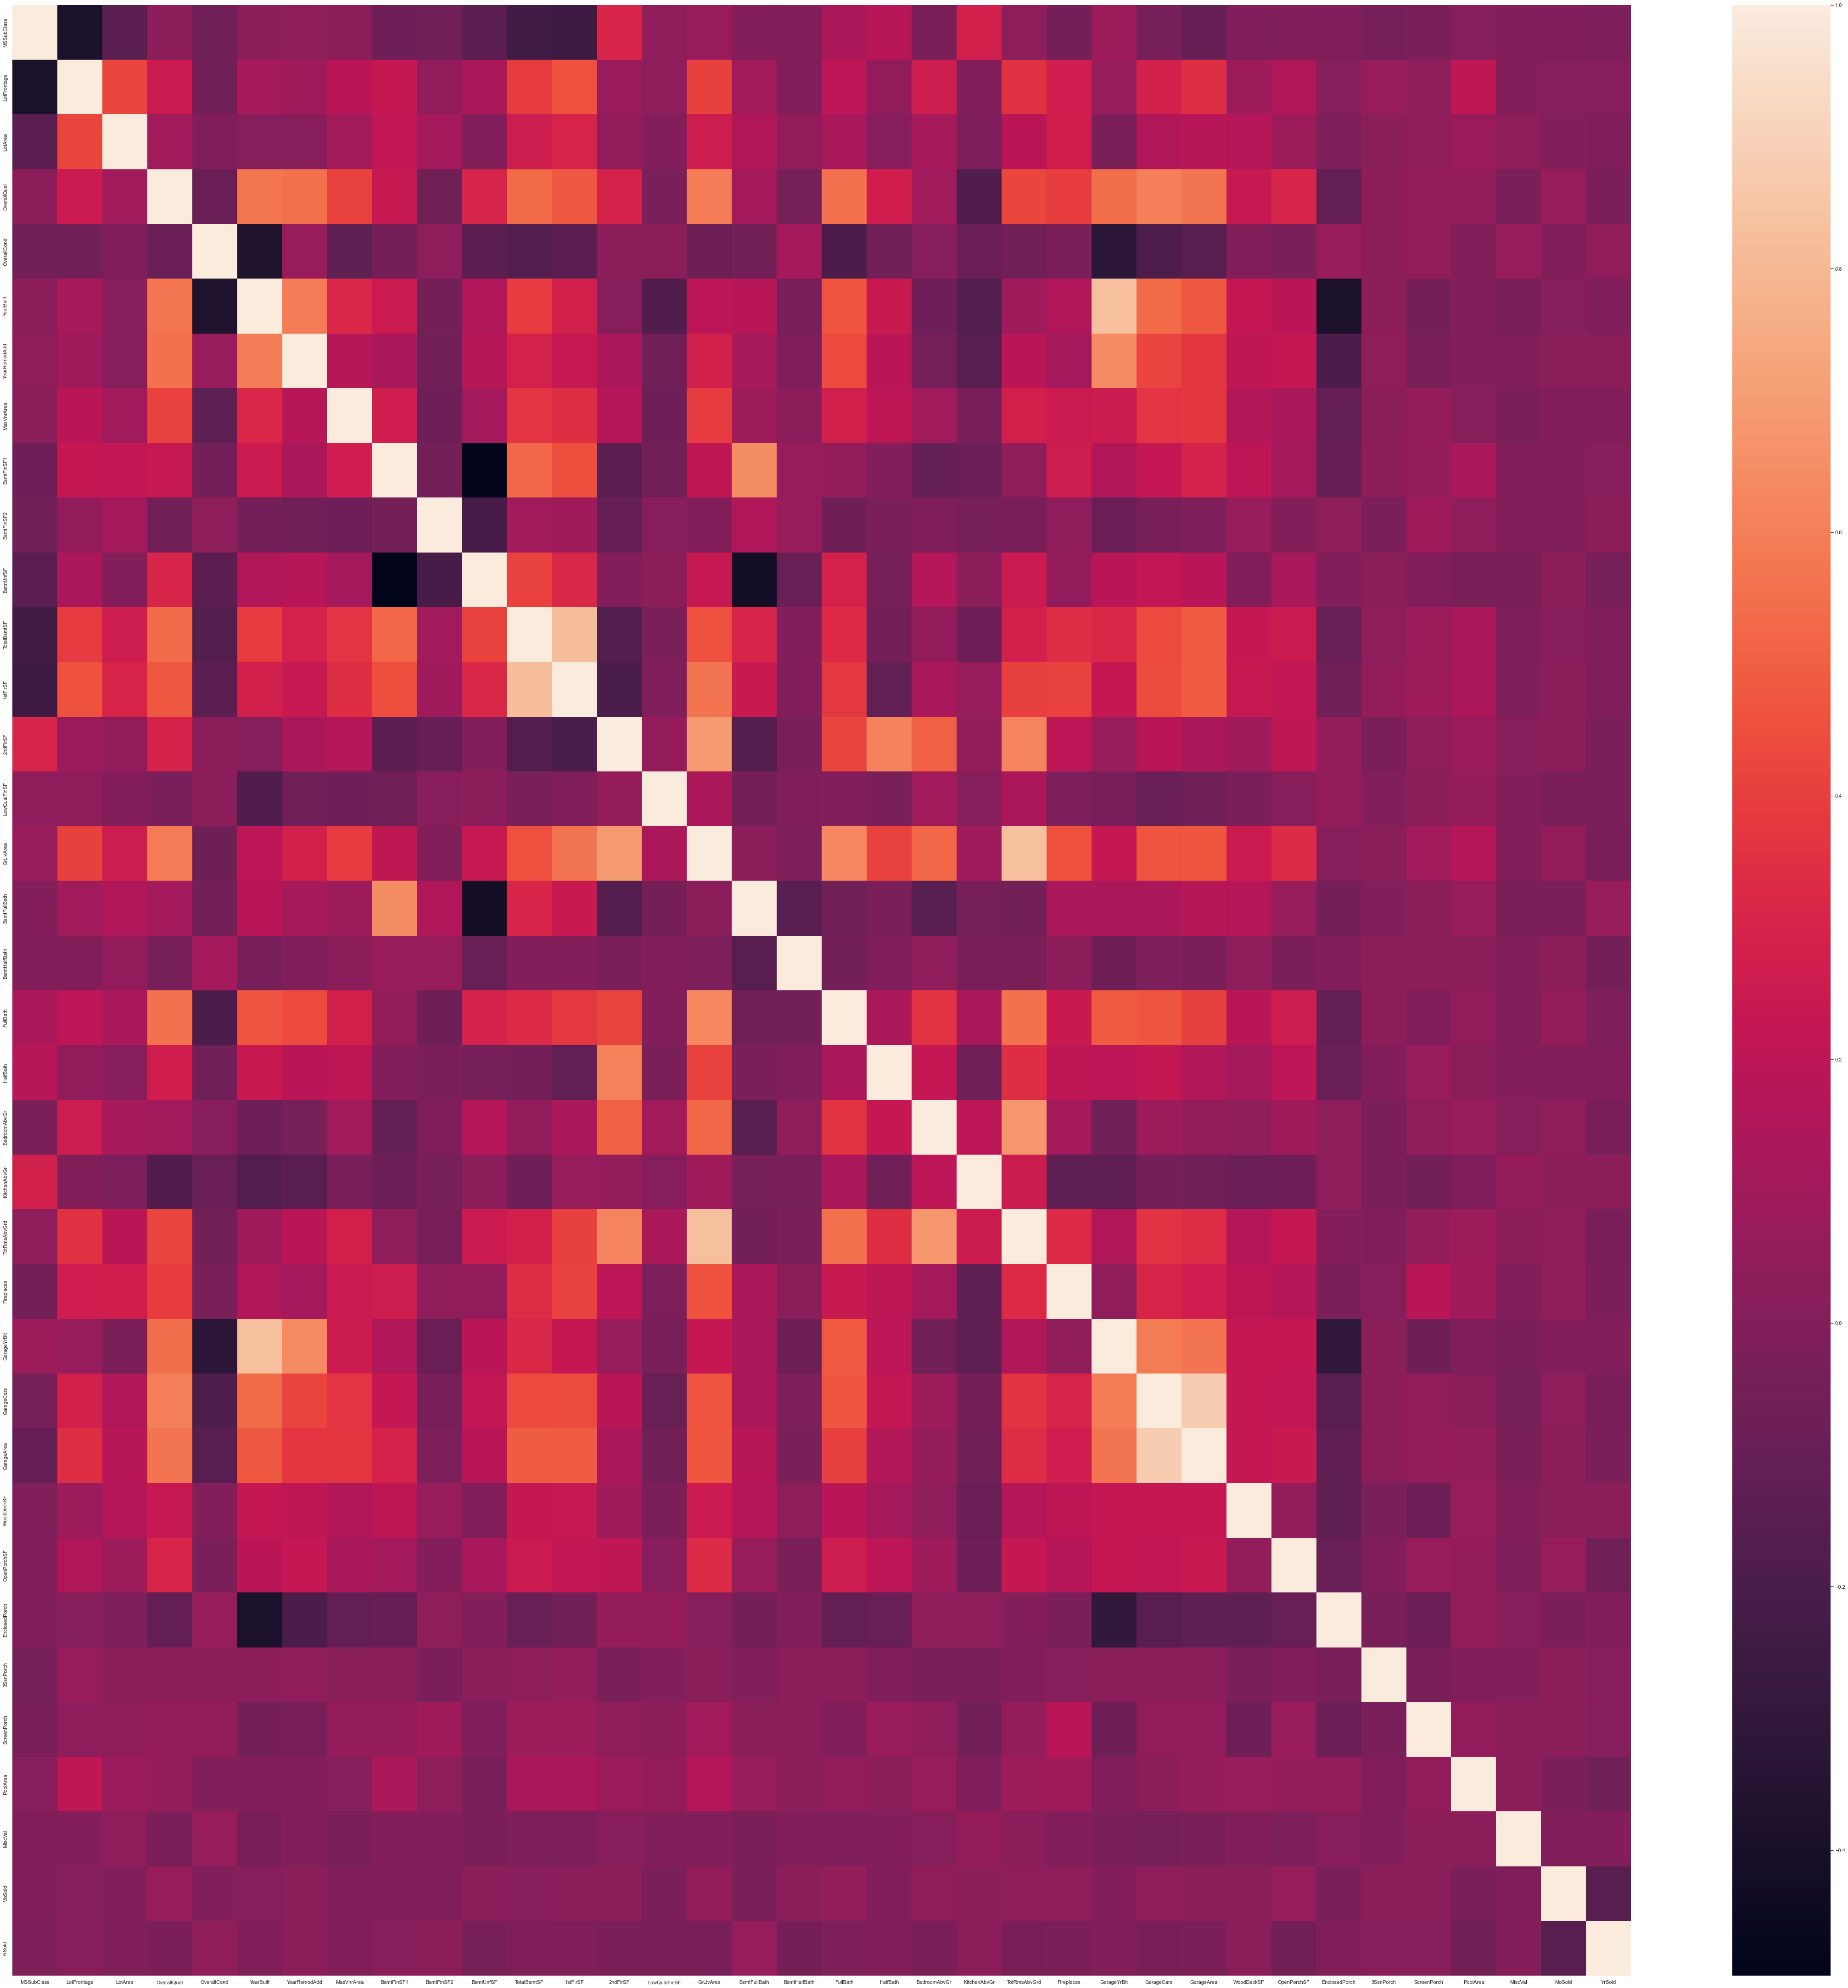

In [118]:
corr = train.corr()
#sns.set(rc = {'figure.figsize':(79,79)})
plot = sns.heatmap(corr)

In [14]:
scaler = StandardScaler()
scaler.fit_transform(train_num)

array([[ 0.07337496, -0.20803433, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.40989452, -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.08444856,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.16683907, -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.08444856, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.20391824, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

De numeriske verdiene skaleres ved hjelp standardscaler

In [15]:

pipe_numerical = Pipeline([
 ('simpleImputer', SimpleImputer(strategy="mean")),
 ('standardScaler', StandardScaler())
 ])
train_prepared = pipe_numerical.fit_transform(train_num)

In [16]:

train_catNA_attribs = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                     'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

train_catNoNA_attribs = list(train.select_dtypes('object').drop(train_catNA,1).columns)

train_num_attribs = list(train.select_dtypes(exclude="object").columns)

pipe_categoricalNoNa = Pipeline([
 ('categoricalNoNA', SimpleImputer(strategy='most_frequent')),# fill nan with most frequent
 ('hot', OneHotEncoder()),
])

pipe_categoricalNa = Pipeline([
 ('categoricalToNA', SimpleImputer(strategy='constant',fill_value='NA')), #nan to 'NA'
 ('hot', OneHotEncoder())
 ])


full_pipeline = ColumnTransformer([
 ('numerical', pipe_numerical, train_num_attribs), #impute mean, scale
 ('categoricalNa',pipe_categoricalNa, train_catNA_attribs),
 ('categoricalNoNa',pipe_categoricalNoNa, train_catNoNA_attribs),
 ])

train_prepared = full_pipeline.fit_transform(train)

<ipython-input-16-97ea35306c43>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_catNoNA_attribs = list(train.select_dtypes('object').drop(train_catNA,1).columns)


In [17]:
train_to_predict = full_pipeline.fit_transform(train)
train_to_predict = train_to_predict.toarray()[:5]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
linReg = LinearRegression()
linReg.fit(train_prepared, houseValues)

linReg_scores = cross_val_score(linReg, train_prepared, houseValues, scoring="neg_mean_squared_error", cv=10)
linReg_MSE = np.sqrt(-linReg_scores.mean())

print("Predictions:", linReg.predict(train_to_predict))
print("Real value: ", list(houseValues[:10]))
print("Mean squared error: ", linReg_MSE)

Predictions: [208545.16614853 205631.00381998 205446.10897716 164731.36923169
 292185.2587979 ]
Real value:  [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]
Mean squared error:  49334.24644755471


In [19]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state=0)
DTregressor.fit(train_prepared, houseValues)
print("Predictions:", DTregressor.predict(train_to_predict))
print("Real house prices:", list(houseValues[:10]))

DTregressor_scores = cross_val_score(DTregressor, train_prepared, houseValues, scoring="neg_mean_squared_error", cv=10)
DTregressor_MSE = np.sqrt(-DTregressor_scores.mean())
print("Mean squared error: ", DTregressor_MSE)

Predictions: [208500. 181500. 223500. 140000. 250000.]
Real house prices: [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]
Mean squared error:  38137.91406474126


In [20]:
#Prøver Random forest regressor og for gode "predictions" men ikke laveste mean squared error.
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state=0)
RFregressor.fit(train_prepared, houseValues)
print("Predictions:", RFregressor.predict(train_to_predict))
print("Real house prices:", list(houseValues[:10]))


RFregressor_scores = cross_val_score(RFregressor, train_prepared, houseValues, scoring="neg_mean_squared_error", cv=10)
RFregressor_MSE = np.sqrt(-RFregressor_scores.mean())
print("Mean squared error: ", RFregressor_MSE)

Predictions: [207925.   174794.32 221547.28 157028.99 264653.5 ]
Real house prices: [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]
Mean squared error:  29974.380920022966


In [21]:
#Eksperimenterer med XGBoost og ser at det gir best resultat og laveste mean squared error. Derfor velger vi å bruke 
# denne modellen.
import xgboost as xgb
from sklearn.model_selection import train_test_split

x, y = train_prepared, houseValues

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

xgbr = xgb.XGBRegressor(verbosity=0, gpu_id=0) 

xgbr.fit(xtrain, ytrain)

print("Predictions: ",xgbr.predict(train_to_predict))
print("Real house prices:", list(houseValues[:10]))

xgbr_scores = cross_val_score(xgbr, train_prepared, houseValues, scoring="neg_mean_squared_error", cv=10)
xgbr_MSE = np.sqrt(-xgbr_scores.mean())
print("Mean squared error: ", xgbr_MSE)

Predictions:  [206334.36 228033.66 158914.95 147569.36 312634.56]
Real house prices: [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]
Mean squared error:  30142.97805301699


In [22]:
#Prøver å "fine tune" XGBoost modellen med GridSearchCV og ser at vi får enda litt bedre resultat.
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [500], 'max_features': [6,7,8], 'n_jobs' : [-1] }
]


grid_search = GridSearchCV(xgbr, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(train_prepared, houseValues);
model = grid_search.best_estimator_
print("Predictions: ", model.predict(train_to_predict))
print("Real house prices:", list(houseValues[:10]))

model_scores = cross_val_score(model, train_prepared, houseValues, scoring="neg_mean_squared_error", cv=10)
model_MSE = np.sqrt(-model_scores.mean())
print("Mean squared error: ", model_MSE)

Predictions:  [184374.23 162284.94 188770.23 166347.05 308930.56]
Real house prices: [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]
Mean squared error:  30110.786379907033


In [23]:
testId=test["Id"]
test=test.drop("Id",1)
test_prepared = full_pipeline.transform(test)
salePrice = model.predict(test_prepared)
salePrice[:10]

<ipython-input-23-2ed5071bab9b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test=test.drop("Id",1)


array([127107.14, 147486.31, 196281.05, 196919.81, 183924.84, 180009.61,
       173605.73, 175466.53, 185642.11, 128351.33], dtype=float32)

In [24]:
submission = pd.DataFrame({'Id': testId, 'SalePrice': salePrice})
submission.head()

,Id,SalePrice
0,1461,127107.140625
1,1462,147486.312500
2,1463,196281.046875
3,1464,196919.812500
4,1465,183924.843750


In [78]:
submission.to_csv('submission.csv', index=False)

In [81]:
from pycaret.classification import *

from pycaret.datasets import get_data
from pycaret.regression import *

dataset = pd.read_csv('data/train.csv')
#custom_pipeline=("pipe",full_pipeline),
train1, test1 = train_test_split(dataset, test_size=0.15, shuffle=True, random_state=37)

exp_name = setup(data = train1, test_data = test1, train_size=0.99, target = 'SalePrice', fold_shuffle = True, fold=10,
            custom_pipeline = full_pipeline, imputation_type='iterative', categorical_imputation='mode', use_gpu = True, normalize = True)

lr = create_model('lr')

save_model(lr, 'final_model_house_values')
#save_model(model,'final_model_house_values')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:43:23
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Id,Numeric
MSSubClass,Categorical
MSZoning,Categorical
LotFrontage,Numeric
LotArea,Numeric
...,...
MoSold,Categorical
YrSold,Categorical
SaleType,Categorical
SaleCondition,Categorical


ValueError: A given column is not a column of the dataframe